In [1]:
import pydataset
from env import get_db_url

import pandas as pd
import numpy as np

from prepare import prep_titanic
from prepare import titanic_split

In [2]:
df = prep_titanic()
df['baseline_prediction'] = 0
df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S,baseline_prediction
0,0,0,3,male,1,0,7.2500,S,0,1,0,1,0
1,1,1,1,female,1,0,71.2833,C,0,0,0,0,0
2,2,1,3,female,0,0,7.9250,S,1,0,0,1,0
3,3,1,1,female,1,0,53.1000,S,0,0,0,1,0
4,4,0,3,male,0,0,8.0500,S,1,1,0,1,0


In [3]:
df, train, validate, test = titanic_split(df)

In [4]:
# inspect size
train.shape, validate.shape, test.shape

((534, 13), (178, 13), (179, 13))

In [5]:
train.info(), validate.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534 entries, 455 to 496
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   passenger_id         534 non-null    int64  
 1   survived             534 non-null    int64  
 2   pclass               534 non-null    int64  
 3   sex                  534 non-null    object 
 4   sibsp                534 non-null    int64  
 5   parch                534 non-null    int64  
 6   fare                 534 non-null    float64
 7   embarked             534 non-null    object 
 8   alone                534 non-null    int64  
 9   sex_male             534 non-null    uint8  
 10  embarked_Q           534 non-null    uint8  
 11  embarked_S           534 non-null    uint8  
 12  baseline_prediction  534 non-null    int64  
dtypes: float64(1), int64(7), object(2), uint8(3)
memory usage: 47.5+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 176 to 

(None, None, None)

In [6]:
df.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S,baseline_prediction
0,0,0,3,male,1,0,7.2500,S,0,1,0,1,0
1,1,1,1,female,1,0,71.2833,C,0,0,0,0,0
2,2,1,3,female,0,0,7.9250,S,1,0,0,1,0
3,3,1,1,female,1,0,53.1000,S,0,0,0,1,0
4,4,0,3,male,0,0,8.0500,S,1,1,0,1,0


In [7]:
df.survived.value_counts()

0    549
1    342
Name: survived, dtype: int64

In [8]:
df.head(1)

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embarked,alone,sex_male,embarked_Q,embarked_S,baseline_prediction
0,0,0,3,male,1,0,7.25,S,0,1,0,1,0


In [9]:
# checking the baseline accuracy
baseline_accuracy = (df.survived == df.baseline_prediction).mean()
baseline_accuracy

0.6161616161616161

In [10]:
df.columns

Index(['passenger_id', 'survived', 'pclass', 'sex', 'sibsp', 'parch', 'fare',
       'embarked', 'alone', 'sex_male', 'embarked_Q', 'embarked_S',
       'baseline_prediction'],
      dtype='object')

In [11]:
df.dtypes

passenger_id             int64
survived                 int64
pclass                   int64
sex                     object
sibsp                    int64
parch                    int64
fare                   float64
embarked                object
alone                    int64
sex_male                 uint8
embarked_Q               uint8
embarked_S               uint8
baseline_prediction      int64
dtype: object

In [12]:
df['fare'] = df['fare'].astype('float64')

In [13]:
# create X & y version of train/validate/test
# where X contains the features we want to use and y is a series with just the target variable

X_train = train.drop(columns=['passenger_id', 'survived', 'sex', 'embarked', 'embarked_Q', 
        'embarked_S', 'baseline_prediction'])
y_train = train.survived

In [14]:
X_validate = validate.drop(columns=['passenger_id', 'survived', 'sex', 'embarked', 'embarked_Q', 
        'embarked_S', 'baseline_prediction'])
y_validate = validate.survived

In [15]:
X_test = test.drop(columns=['passenger_id', 'survived', 'sex', 'embarked', 'embarked_Q', 
        'embarked_S', 'baseline_prediction'])
y_test = test.survived

In [16]:
#Compare df columns

print(f"""train:
{train.columns.to_list()} 
_____________________________________________
X_train:
{X_train.columns.to_list()}
_____________________________________________
X_validate:
{X_validate.columns.to_list()}
""")

train:
['passenger_id', 'survived', 'pclass', 'sex', 'sibsp', 'parch', 'fare', 'embarked', 'alone', 'sex_male', 'embarked_Q', 'embarked_S', 'baseline_prediction'] 
_____________________________________________
X_train:
['pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male']
_____________________________________________
X_validate:
['pclass', 'sibsp', 'parch', 'fare', 'alone', 'sex_male']



# 2. Evaluate your results using the model score, confusion matrix, and classification report.

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [18]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')


In [19]:
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [20]:
y_train_pred = knn.predict(X_train)
y_train_pred

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,

In [21]:
y_pred_proba = knn.predict_proba(X_train)
y_pred_proba

array([[0.8, 0.2],
       [0.2, 0.8],
       [0.4, 0.6],
       ...,
       [0.8, 0.2],
       [1. , 0. ],
       [0.2, 0.8]])

# 3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [22]:
print('Accuracy of KNN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))

Accuracy of KNN classifier on training set: 0.80


In [23]:
pred_1 = pd.crosstab( y_train_pred, y_train, rownames=['Actual'], colnames=['Prediction'])
pred_1

Prediction,0,1
Actual,,
0,272,48
1,57,157


In [24]:
y_train.value_counts()


0    329
1    205
Name: survived, dtype: int64

In [25]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84       329
           1       0.73      0.77      0.75       205

    accuracy                           0.80       534
   macro avg       0.79      0.80      0.79       534
weighted avg       0.81      0.80      0.80       534



In [26]:
cm = confusion_matrix(y_train, y_train_pred)
pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], 
             columns=['Pred 0', 'Pred 1'])

,Pred 0,Pred 1
Actual 0,272,57
Actual 1,48,157


In [27]:
tn, fp, fn, tp = cm.ravel()

accuracy = (tp + tn)/(tn + fp + fn + tp)

true_positive_rate = tp/(tp + fn)
false_positive_rate = fp/(fp + tn)
true_negative_rate = tn/(tn + fp)
false_negative_rate = fn/(fn + tp)

precision = tp/(tp + fp)
recall = tp/(tp + fn)
f1_score = 2*(precision*recall)/(precision+recall)

support_pos = tp + fn
support_neg = fp + tn

dict = {
    'metric' : ['accuracy'
                ,'true_positive_rate'
                ,'false_positive_rate'
                ,'true_negative_rate'
                ,'false_negative_rate'
                ,'precision'
                ,'recall'
                ,'f1_score'
                ,'support_pos'
                ,'support_neg']
    ,'score' : [accuracy
                ,true_positive_rate
                ,false_positive_rate
                ,true_negative_rate
                ,false_negative_rate
                ,precision
                ,recall
                ,f1_score
                ,support_pos
                ,support_neg]
}

pd.DataFrame(dict)

,metric,score
0,accuracy,0.803371
1,true_positive_rate,0.765854
2,false_positive_rate,0.173252
3,true_negative_rate,0.826748
4,false_negative_rate,0.234146
5,precision,0.733645
6,recall,0.765854
7,f1_score,0.749403
8,support_pos,205.000000
9,support_neg,329.000000


# 4. Run through steps 1-3 setting k to 10

In [28]:
def knn_fit_predict(k, X_train, y_train, X_validate):
    '''
    This function takes n_neighbors, X_train,  target  and X_val
    and returns knn, predictions for train set and validate set
    '''
    # MAKE the thing
    knn = KNeighborsClassifier(n_neighbors=k)

    # FIT the thing
    knn.fit(X_train, y_train)

    # USE the thing
    y_train_pred = knn.predict(X_train)
    y_validate_pred = knn.predict(X_validate)
    
    return knn, y_train_pred, y_validate_pred




#Now, let's make a function to return the 
#accuracy, confusion matrix and classification report

def evaluate_clf(model=knn, X=X_train, y=y_train, y_pred=y_train_pred):
    '''
    This function can be used on any classification model
    It takes in a model, features, target and prediction
    and returns the accuracy, confusion matrix and classification report
    '''
    # model score
    accuracy = model.score(X, y)

    # confusion matrix
    cm = confusion_matrix(y, y_pred)
    cmdf = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], 
                       columns=['Pred 0', 'Pred 1'])

    # classification report
    crdf = pd.DataFrame(classification_report(y, y_pred, output_dict=True))
    
    # confusion matrix metrics
    metrics = knn_metrics(cm)
    
    return accuracy, cmdf, crdf, metrics


def knn_metrics(cm):


    tn, fp, fn, tp = cm.ravel()

    accuracy = (tp + tn)/(tn + fp + fn + tp)

    true_positive_rate = tp/(tp + fn)
    false_positive_rate = fp/(fp + tn)
    true_negative_rate = tn/(tn + fp)
    false_negative_rate = fn/(fn + tp)

    precision = tp/(tp + fp)
    recall = tp/(tp + fn)
    f1_score = 2*(precision*recall)/(precision+recall)

    support_pos = tp + fn
    support_neg = fp + tn

    dict = {
        'metric' : ['accuracy'
                    ,'true_positive_rate'
                    ,'false_positive_rate'
                    ,'true_negative_rate'
                    ,'false_negative_rate'
                    ,'precision'
                    ,'recall'
                    ,'f1_score'
                    ,'support_pos'
                    ,'support_neg']
        ,'score' : [accuracy
                    ,true_positive_rate
                    ,false_positive_rate
                    ,true_negative_rate
                    ,false_negative_rate
                    ,precision
                    ,recall
                    ,f1_score
                    ,support_pos
                    ,support_neg]
    }

    pd.DataFrame(dict)
    


In [29]:
#using the functions we created above, and store what's returned in variables:
k = 10
knn, y_train_pred, y_validate_pred = knn_fit_predict(k, 
                                                     X_train, 
                                                     y_train, 
                                                     X_validate)
accuracy_t, cmdf_t, crdf_t, met_t = evaluate_clf(knn, X_train, y_train, y_train_pred)

accuracy_v, cmdf_v, crdf_v, met_v = evaluate_clf(knn, X_validate, y_validate, y_validate_pred)

In [30]:
print(f"""KNN where K = {k}

********Train Evaluation********

Accuracy: {accuracy_t}

Confusion Matrix:
{cmdf_t}

Classification Report:
{crdf_t}

Metrics: 
{met_t}
 
________________________________________________

********Validate Evaluation********

Accuracy: {accuracy_v}

Confusion Matrix:
{cmdf_v}

Classification Report:
{crdf_v}

Metrics: 
{met_v}

""")

KNN where K = 10

********Train Evaluation********

Accuracy: 0.7883895131086143

Confusion Matrix:
          Pred 0  Pred 1
Actual 0     281      48
Actual 1      65     140

Classification Report:
                    0           1  accuracy   macro avg  weighted avg
precision    0.812139    0.744681   0.78839    0.778410      0.786242
recall       0.854103    0.682927   0.78839    0.768515      0.788390
f1-score     0.832593    0.712468   0.78839    0.772530      0.786477
support    329.000000  205.000000   0.78839  534.000000    534.000000

Metrics: 
None
 
________________________________________________

********Validate Evaluation********

Accuracy: 0.7191011235955056

Confusion Matrix:
          Pred 0  Pred 1
Actual 0      84      26
Actual 1      24      44

Classification Report:
                    0          1  accuracy   macro avg  weighted avg
precision    0.777778   0.628571  0.719101    0.703175      0.720778
recall       0.763636   0.647059  0.719101    0.705348      0

# 5. Run through steps 1-3 setting k to 20

In [31]:
def knn_fit_predict(k, X_train, y_train, X_validate):
    '''
    This function takes n_neighbors, X_train,  target  and X_val
    and returns knn, predictions for train set and validate set
    '''
    # MAKE the thing
    knn = KNeighborsClassifier(n_neighbors=k)

    # FIT the thing
    knn.fit(X_train, y_train)

    # USE the thing
    y_train_pred = knn.predict(X_train)
    y_validate_pred = knn.predict(X_validate)
    
    return knn, y_train_pred, y_validate_pred




#Now, let's make a function to return the 
#accuracy, confusion matrix and classification report

def evaluate_clf(model=knn, X=X_train, y=y_train, y_pred=y_train_pred):
    '''
    This function can be used on any classification model
    It takes in a model, features, target and prediction
    and returns the accuracy, confusion matrix and classification report
    '''
    # model score
    accuracy = model.score(X, y)

    # confusion matrix
    cm = confusion_matrix(y, y_pred)
    cmdf = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], 
                       columns=['Pred 0', 'Pred 1'])

    # classification report
    crdf = pd.DataFrame(classification_report(y, y_pred, output_dict=True))
    
    # confusion matrix metrics
    metrics = knn_metrics(cm)
    
    return accuracy, cmdf, crdf, metrics


def knn_metrics(cm):


    tn, fp, fn, tp = cm.ravel()

    accuracy = (tp + tn)/(tn + fp + fn + tp)

    true_positive_rate = tp/(tp + fn)
    false_positive_rate = fp/(fp + tn)
    true_negative_rate = tn/(tn + fp)
    false_negative_rate = fn/(fn + tp)

    precision = tp/(tp + fp)
    recall = tp/(tp + fn)
    f1_score = 2*(precision*recall)/(precision+recall)

    support_pos = tp + fn
    support_neg = fp + tn

    dict = {
        'metric' : ['accuracy'
                    ,'true_positive_rate'
                    ,'false_positive_rate'
                    ,'true_negative_rate'
                    ,'false_negative_rate'
                    ,'precision'
                    ,'recall'
                    ,'f1_score'
                    ,'support_pos'
                    ,'support_neg']
        ,'score' : [accuracy
                    ,true_positive_rate
                    ,false_positive_rate
                    ,true_negative_rate
                    ,false_negative_rate
                    ,precision
                    ,recall
                    ,f1_score
                    ,support_pos
                    ,support_neg]
    }

    pd.DataFrame(dict)
    


In [32]:
k = 20
knn, y_train_pred, y_validate_pred = knn_fit_predict(k, 
                                                     X_train, 
                                                     y_train, 
                                                     X_validate)
accuracy_t, cmdf_t, crdf_t, met_t = evaluate_clf(knn, X_train, y_train, y_train_pred)

accuracy_v, cmdf_v, crdf_v, met_v = evaluate_clf(knn, X_validate, y_validate, y_validate_pred)

In [33]:
print(f"""KNN where K = {k}

********Train Evaluation********

Accuracy: {accuracy_t}

Confusion Matrix:
{cmdf_t}

Classification Report:
{crdf_t}

Metrics: 
{met_t}
 
________________________________________________

********Validate Evaluation********

Accuracy: {accuracy_v}

Confusion Matrix:
{cmdf_v}

Classification Report:
{crdf_v}

Metrics: 
{met_v}

""")

KNN where K = 20

********Train Evaluation********

Accuracy: 0.7509363295880149

Confusion Matrix:
          Pred 0  Pred 1
Actual 0     279      50
Actual 1      83     122

Classification Report:
                    0           1  accuracy   macro avg  weighted avg
precision    0.770718    0.709302  0.750936    0.740010      0.747141
recall       0.848024    0.595122  0.750936    0.721573      0.750936
f1-score     0.807525    0.647215  0.750936    0.727370      0.745983
support    329.000000  205.000000  0.750936  534.000000    534.000000

Metrics: 
None
 
________________________________________________

********Validate Evaluation********

Accuracy: 0.6629213483146067

Confusion Matrix:
          Pred 0  Pred 1
Actual 0      84      26
Actual 1      34      34

Classification Report:
                    0          1  accuracy   macro avg  weighted avg
precision    0.711864   0.566667  0.662921    0.639266      0.656396
recall       0.763636   0.500000  0.662921    0.631818      0

# 6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

In [34]:
def knn_fit_predict(k, X_train, y_train):
    '''
    This function takes n_neighbors, X_train,  target  and X_val
    and returns knn, predictions for train set and validate set
    '''
    # MAKE the thing
    knn = KNeighborsClassifier(n_neighbors=k)

    # FIT the thing
    knn.fit(X_train, y_train)

    # USE the thing
    y_train_pred = knn.predict(X_train)
    y_validate_pred = knn.predict(X_validate)
    
    return knn, y_train_pred, k

In [49]:
i = [10, 20]

train_depth = []
train_score_list = []
trn_report_list = []




for i in i:
    knn, y_pred, k = knn_fit_predict(i, X_train, y_train)

    # Compute score
    trn_score = knn.score(X_train, y_train)
    trn_report = classification_report(y_train, y_pred)
    
    train_score_list.append(trn_score)
    trn_report_list.append(trn_report)
    train_depth.append(i)
    
    print(f'Training Dataset Model with Max Depth of {i},')

    # Print the model's accuracy and other information
    print(f"Model's Accuracy: {trn_score}")
    print(f"Difference between Model and Basleine Accuracy: {trn_score - baseline_accuracy}")
    print('Train Classification Report')
    print(trn_report)
    print()

    print('----------------------------------------------------')
    print()

Training Dataset Model with Max Depth of 10,
Model's Accuracy: 0.7883895131086143
Difference between Model and Basleine Accuracy: 0.17222789694699814
Train Classification Report
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       329
           1       0.74      0.68      0.71       205

    accuracy                           0.79       534
   macro avg       0.78      0.77      0.77       534
weighted avg       0.79      0.79      0.79       534


----------------------------------------------------

Training Dataset Model with Max Depth of 20,
Model's Accuracy: 0.7509363295880149
Difference between Model and Basleine Accuracy: 0.1347747134263988
Train Classification Report
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       329
           1       0.71      0.60      0.65       205

    accuracy                           0.75       534
   macro avg       0.74      0.72      0.73  

# 7. Which model performs best on our out-of-sample data from validate?

In [50]:
i = [10, 20]

val_depth = []
val_score_list = []
val_report_list = []




for i in i:
    knn, y_pred, k = knn_fit_predict(i, X_train, y_train)

    # Compute score
    val_score = knn.score(X_validate, y_validate)
    y_val_pred = knn.predict(X_validate)
    val_report = classification_report(y_validate, y_val_pred)
    
    val_score_list.append(val_score)
    val_report_list.append(val_report)
    val_depth.append(i)
    
    print(f'Training Dataset Model with Max Depth of {i},')

    # Print the model's accuracy and other information
    print(f"Model's Accuracy: {val_score}")
    print(f"Difference between Model and Basleine Accuracy: {val_score - baseline_accuracy}")
    print('Train Classification Report')
    print(val_report)
    print()

    print('----------------------------------------------------')
    print()

Training Dataset Model with Max Depth of 10,
Model's Accuracy: 0.7191011235955056
Difference between Model and Basleine Accuracy: 0.10293950743388947
Train Classification Report
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       110
           1       0.63      0.65      0.64        68

    accuracy                           0.72       178
   macro avg       0.70      0.71      0.70       178
weighted avg       0.72      0.72      0.72       178


----------------------------------------------------

Training Dataset Model with Max Depth of 20,
Model's Accuracy: 0.6629213483146067
Difference between Model and Basleine Accuracy: 0.04675973215299056
Train Classification Report
              precision    recall  f1-score   support

           0       0.71      0.76      0.74       110
           1       0.57      0.50      0.53        68

    accuracy                           0.66       178
   macro avg       0.64      0.63      0.63 

In [52]:
i = 1


# storing my values to use them to create dictiojnaries containg 
# all the collected data for head to head comaprison
train_depth = []
train_score_list = [] 
val_score_list = []
trn_report_list = []
val_report_list = []
diff_list = []

while i < 21:
    
    knn, y_pred, k = knn_fit_predict(i, X_train, y_train)

    # Compute score
    trn_score = knn.score(X_train, y_train)
    val_score = knn.score(X_validate, y_validate)
    trn_report = classification_report(y_train, y_pred)
    y_val_pred = knn.predict(X_validate)
    val_report = classification_report(y_validate, y_val_pred)
    val_report_list.append(val_report)
    train_score_list.append(trn_score)
    val_score_list.append(val_score)
    train_depth.append(i)


    print(f'Training Dataset Model with Max Depth of {i},')

    # Print the model's accuracy and other information
    print(f"Model's Accuracy: {trn_score}")
    print(f"Difference between Model and Basleine Accuracy: {trn_score - baseline_accuracy}")
    print('Train Classification Report')
    print(trn_report)
    print()
    print('           VS             ')
    print()
    print(f'Validation Dataset Model with Max Depth of {i},')

    print(f"Model's Accuracy: {val_score}")
    print(f"Difference between Model and Basleine Accuracy: {val_score - baseline_accuracy}")
    print('Validate Classification Report')
    print(val_report)
    print()
    print(f'Difference bewtween Training and Validate:{trn_score-val_score}')
    #print(val_report)
    print()
    print('----------------------------------------------------')
    print()

    # Increment 'i' and 'j' for the next iteration
    i += 1

    diff = trn_score-val_score
    diff_list.append(diff)

# create dictionaries for my data collection
train_dict = {x: y for x, y in zip(train_depth, train_score_list)}
val_dict = {x: y for x, y in zip(train_depth, val_score_list)}
diff_dict = {x: y for x, y in zip(train_depth, diff_list)}


model_number = 1
for key, value in diff_dict.items():
    if value == min(diff_dict.values()):
        print()
        print(f'Top Model #{model_number}')
        print('*************FINAL ANALYSIS*************')
        print()
        print(f'''Top performing Training Model:
        Max Depth:{key}
        Accuracy:{max(train_dict.values())}
        
Top performing Validation Model:

        Max Depth:{key}
        Accuracy:{max(val_dict.values())}
        Difference:{min(diff_dict.values())}''')
        model_number+=1

Training Dataset Model with Max Depth of 1,
Model's Accuracy: 0.8876404494382022
Difference between Model and Basleine Accuracy: 0.27147883327658606
Train Classification Report
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       329
           1       0.82      0.91      0.86       205

    accuracy                           0.89       534
   macro avg       0.88      0.89      0.88       534
weighted avg       0.89      0.89      0.89       534


           VS             

Validation Dataset Model with Max Depth of 1,
Model's Accuracy: 0.6797752808988764
Difference between Model and Basleine Accuracy: 0.06361366473726027
Validate Classification Report
              precision    recall  f1-score   support

           0       0.77      0.68      0.72       110
           1       0.57      0.68      0.62        68

    accuracy                           0.68       178
   macro avg       0.67      0.68      0.67       178
weighted avg 

Training Dataset Model with Max Depth of 13,
Model's Accuracy: 0.7715355805243446
Difference between Model and Basleine Accuracy: 0.15537396436272843
Train Classification Report
              precision    recall  f1-score   support

           0       0.82      0.81      0.81       329
           1       0.70      0.71      0.71       205

    accuracy                           0.77       534
   macro avg       0.76      0.76      0.76       534
weighted avg       0.77      0.77      0.77       534


           VS             

Validation Dataset Model with Max Depth of 13,
Model's Accuracy: 0.7134831460674157
Difference between Model and Basleine Accuracy: 0.09732152990579956
Validate Classification Report
              precision    recall  f1-score   support

           0       0.79      0.73      0.76       110
           1       0.61      0.69      0.65        68

    accuracy                           0.71       178
   macro avg       0.70      0.71      0.70       178
weighted av

In [56]:
key_values = []
for key, value in diff_dict.items():
    key_values.append(key)

In [57]:
train_values = train_dict.values()
validate_values = val_dict.values()
diff_values = diff_dict.values()

In [58]:
df = pd.DataFrame({'depth':key_values, 'train_acc':train_values, 'validate_acc':validate_values, 'difference':diff_values})


In [60]:
import matplotlib.pyplot as plt

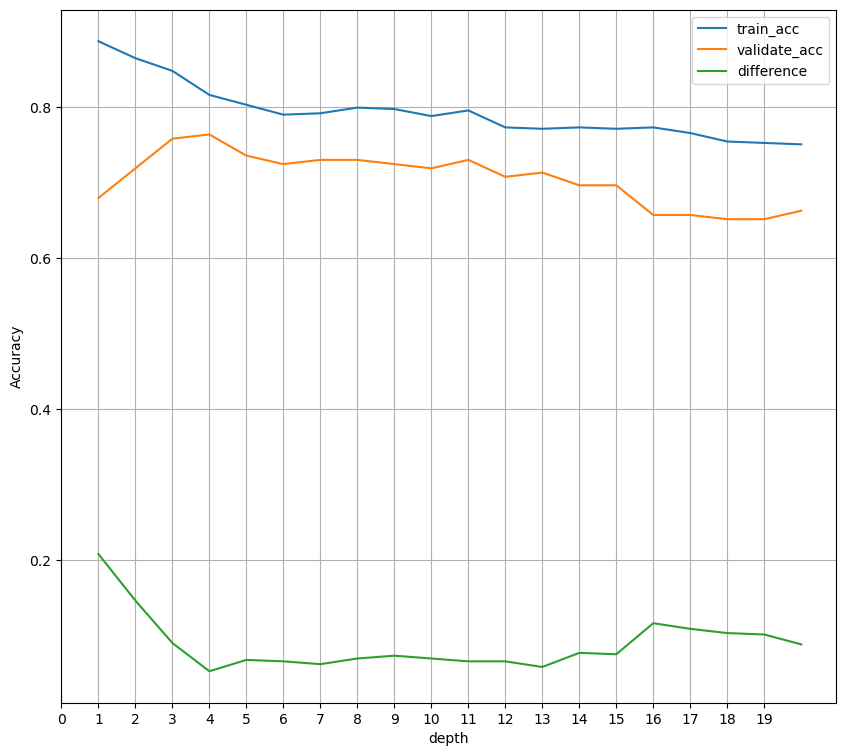

In [63]:
df.set_index('depth').plot(figsize = (10,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,20,1))
plt.grid()